In [34]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [35]:
raw_data = pd.read_csv("data/Admittance.csv")
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [36]:
raw_data["Admitted"] = raw_data["Admitted"].map({"Yes":1,"No":0})
raw_data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


In [37]:
data = raw_data.copy()
data.describe()

,SAT,Admitted
count,168.000000,168.000000
mean,1695.273810,0.559524
std,183.019017,0.497928
min,1334.000000,0.000000
25%,1547.500000,0.000000
50%,1691.500000,1.000000
75%,1844.500000,1.000000
max,2050.000000,1.000000


In [50]:
x1 = data['SAT']
y = data["Admitted"]

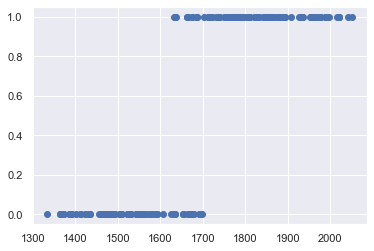

In [51]:
plt.scatter(x1,y)

In [52]:
x = sm.add_constant(x1)
results_lin = sm.OLS(y,x).fit()

In [60]:
results_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Admitted   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     357.5
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           2.98e-43
Time:                        22:54:13   Log-Likelihood:                -24.262
No. Observations:                 168   AIC:                             52.52
Df Residuals:                     166   BIC:                             58.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2519      0.203    -16.038      0.000      -3.652      -2.852
SAT            0.0022      0.000     18.907      0.000       0.002       0.002
==============================================================================
Omnibus:                        7.929   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                3.844
Skew:                           0.090   Prob(JB):                        0.146
Kurtosis:                       2.281   Cond. No.                     1.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
results_lin.params

const   -3.251859
SAT      0.002248
dtype: float64

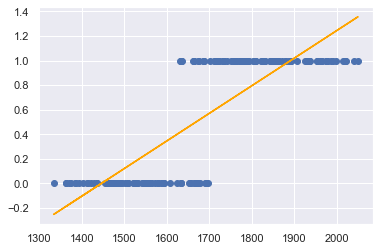

In [54]:
plt.scatter(x1,y)
y_hat = x1*0.002248-3.2518
plt.plot(x1,y_hat,color="orange")

In [55]:
x1

0      1363
1      1792
2      1954
3      1653
4      1593
       ... 
163    1722
164    1750
165    1555
166    1524
167    1461
Name: SAT, Length: 168, dtype: int64

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


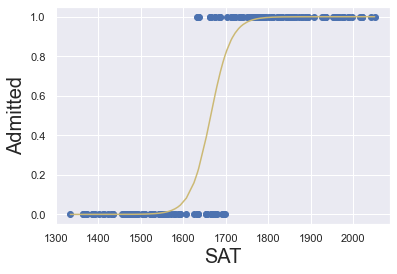

In [56]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

In [57]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y)

In [65]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [66]:
model.score(X_test,y_test)

0.9285714285714286

In [67]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

results_log.predict()

array([0.00, 1.00, 1.00, 0.38, 0.05, 0.98, 0.99, 1.00, 1.00, 0.03, 1.00,
       1.00, 0.50, 0.00, 0.77, 1.00, 0.21, 0.22, 0.23, 1.00, 1.00, 1.00,
       0.00, 0.00, 0.91, 1.00, 0.22, 1.00, 1.00, 0.98, 0.00, 0.61, 0.41,
       1.00, 1.00, 1.00, 0.50, 1.00, 0.39, 0.00, 0.04, 0.20, 1.00, 0.00,
       1.00, 0.00, 0.98, 0.00, 0.00, 0.01, 0.01, 1.00, 0.80, 0.01, 1.00,
       0.00, 0.56, 0.95, 0.22, 0.99, 0.01, 0.89, 1.00, 1.00, 0.99, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.89, 0.22, 0.00, 1.00, 1.00, 1.00, 0.00,
       0.49, 1.00, 1.00, 0.01, 1.00, 1.00, 0.65, 1.00, 1.00, 0.00, 1.00,
       0.99, 0.72, 0.60, 0.00, 0.95, 0.91, 0.00, 1.00, 1.00, 0.01, 0.98,
       0.88, 0.99, 0.00, 0.99, 0.03, 0.00, 0.99, 0.99, 1.00, 0.00, 0.00,
       0.04, 0.52, 0.00, 1.00, 0.16, 0.00, 0.92, 0.00, 0.47, 1.00, 1.00,
       0.02, 0.00, 0.00, 1.00, 0.01, 0.96, 0.75, 0.72, 0.94, 0.60, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.08, 0.00, 0.01, 1.00, 0.98, 0.70,
       0.99, 1.00, 0.02, 0.00, 0.00, 0.00, 0.83, 1.

In [68]:
np.array(data['Admitted'])
results_log.pred_table()

array([[67.00, 7.00],
       [7.00, 87.00]])

In [69]:
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,67.0,7.0
Actual 1,7.0,87.0


In [70]:
cm = np.array(cm_df)

accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.9166666666666666

In [74]:
test = pd.read_csv('data/TestDataset.csv').drop("Gender",axis=1)
test

,SAT,Admitted
0,1323,No
1,1725,Yes
2,1762,Yes
3,1777,Yes
4,1665,No
5,1556,Yes
6,1731,Yes
7,1809,Yes
8,1930,Yes
9,1708,Yes


In [75]:
# Map the test data as you did with the train data
test['Admitted'] = test['Admitted'].map({'Yes': 1, 'No': 0})
test

,SAT,Admitted
0,1323,0
1,1725,1
2,1762,1
3,1777,1
4,1665,0
5,1556,1
6,1731,1
7,1809,1
8,1930,1
9,1708,1


In [77]:
# Get the actual values (true valies ; targets)
test_actual = test['Admitted']
# Prepare the test data to be predicted
test_data = test.drop(['Admitted'],axis=1)
test_data = sm.add_constant(test_data)
test_data

,const,SAT
0,1.0,1323
1,1.0,1725
2,1.0,1762
3,1.0,1777
4,1.0,1665
5,1.0,1556
6,1.0,1731
7,1.0,1809
8,1.0,1930
9,1.0,1708


In [78]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and the accuracy
        return cm, accuracy

In [79]:
# Create a confusion matrix with the test data
cm = confusion_matrix(test_data,test_actual,results_log)
cm

(array([[4.00, 2.00],
        [1.00, 12.00]]),
 0.8421052631578947)

In [80]:
# Format for easier understanding (not needed later on)
cm_df = pd.DataFrame(cm[0])
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,4.0,2.0
Actual 1,1.0,12.0


In [81]:
# Check the missclassification rate
# Note that Accuracy + Missclassification rate = 1 = 100%
print ('Missclassification rate: '+str((1+1)/19))

Missclassification rate: 0.10526315789473684
